In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import python_scripts.data_processing as dp
import dtreeviz as dtree
import graphviz.backend as be
from IPython.display import Image, display_svg, SVG
from sklearn.tree import plot_tree
import warnings

warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import (
    train_test_split,
    KFold,
    cross_val_score,
    cross_validate,
)
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    confusion_matrix,
    classification_report,
    precision_score,
)

In [2]:
df = pd.read_csv("../data/3year.csv")
X_train, X_test, y_train, y_test = dp.pre_process(df)

In [3]:
# X_train, X_test, y_train, y_test = dp.get_train_test(df)

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.854649317676928
F1 Score: 0.14869888475836432
Recall Score: 0.29850746268656714
Confusion Matrix:
 [[2653  364]
 [  94   40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      3017
           1       0.10      0.30      0.15       134

    accuracy                           0.85      3151
   macro avg       0.53      0.59      0.53      3151
weighted avg       0.93      0.85      0.89      3151



<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


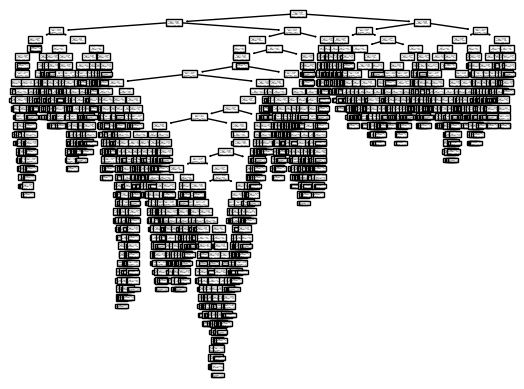

In [5]:
# Reset the index of the DataFrame
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
num_folds = 5

# Initialize KFold cross-validation iterator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create an empty list to store confusion matrices for each fold
confusion_matrices = []
reports = []

# TODO: set Max-depth

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Fit the classifier on the training fold
    dt.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_pred_fold = dt.predict(X_val_fold)

    # Calculate and store the confusion matrix for the fold
    cm_fold = confusion_matrix(y_val_fold, y_pred_fold)
    confusion_matrices.append(cm_fold)
    report = classification_report(y_val_fold, y_pred_fold)

    reports.append(report)

    """ plt.figure(figsize=(40,10))
    plot_tree(dt, feature_names=X_train.columns, class_names=["Class 0", "Class 1"], filled=True,
              impurity=False, fontsize=10, rounded=True, max_depth=3)
    plt.show() """

    plot_tree(dt)

    viz = dtree.trees.model(
        dt,
        X_train_fold.values,
        y_train_fold.values,
        # target_name='Class',
        feature_names=X_train.columns.tolist(),
        class_names=["Class 0", "Class 1"],
    )


# Print confusion matrices for each fold
""" for i, cm in enumerate(confusion_matrices):
    print(f"Confusion matrix for fold {i + 1}:")
    print(cm)
    print() 
#print(len(reports))
for i, r in enumerate(reports):
    print(f"Classification report for fold {i + 1}:")
    print(r)
    print()
"""
# hey
# hey

viz

In [6]:
scoring = ["accuracy", "f1", "recall", "precision", "roc_auc"]
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
scores = cross_validate(dt, X_train, y_train, cv=kf, scoring=scoring)

print("Cross-validation scores:")
for metric, values in scores.items():
    print(f"{metric}: {np.mean(values)}")

Cross-validation scores:
fit_time: 0.4137098789215088
score_time: 0.013657522201538087
test_accuracy: 0.8876801768946695
test_f1: 0.8903061311195881
test_recall: 0.9120994459258889
test_precision: 0.8695500399438508
test_roc_auc: 0.8876762235118768


In [7]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.780387178673437
F1 Score: 0.18588235294117647
Recall Score: 0.5895522388059702
Confusion Matrix:
 [[2380  637]
 [  55   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      3017
           1       0.11      0.59      0.19       134

    accuracy                           0.78      3151
   macro avg       0.54      0.69      0.53      3151
weighted avg       0.94      0.78      0.84      3151



In [8]:
gb_clf = GradientBoostingClassifier(random_state=42)
num_folds = 5
scoring = "accuracy"

cv_scores = cross_val_score(gb_clf, X_train, y_train, cv=num_folds, scoring=scoring)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nEvaluation Metrics on Test Data:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Cross-Validation Scores: [0.81151645 0.82260372 0.83655222 0.83255814 0.83864043]
Mean CV Accuracy: 0.8283741916000625

Evaluation Metrics on Test Data:
Accuracy: 0.780387178673437
F1 Score: 0.18588235294117647
Recall Score: 0.5895522388059702
Confusion Matrix:
 [[2380  637]
 [  55   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      3017
           1       0.11      0.59      0.19       134

    accuracy                           0.78      3151
   macro avg       0.54      0.69      0.53      3151
weighted avg       0.94      0.78      0.84      3151

